In [26]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player Metrics\full_players_with_pos_fbref_ds.csv'

# Load the CSV file into a DataFrame
players_df = pd.read_csv(file_path)

import pandas as pd

# Assuming 'final_merged_df' is your DataFrame that includes the 'league' column
leagues_to_remove = ['JAP-J1 League', 'RUS-League', 'AUT-Football Bundesliga', 'TUR-League']

# Filter the DataFrame to keep only the rows where 'league' is not in the list of leagues to remove
new_players_df = players_df[~players_df['league'].isin(leagues_to_remove)]

# Filter the DataFrame to include only rows where 'RB' or 'RWB' appears in 'main_pos' or '2nd_pos'
CM_df = new_players_df[(new_players_df['main_pos'].isin(['CM', 'CDM', 'RM', 'LM'])) | 
                                            (new_players_df['2nd_pos'].isin(['CM', 'CDM', 'RM', 'LM']))]

# Display the first few rows of the filtered DataFrame to verify
print(CM_df.head(10))


                league  season         team            player nation    pos  \
5   ENG-Premier League    2324      Arsenal       Declan Rice    ENG     MF   
7   ENG-Premier League    2324      Arsenal  Emile Smith Rowe    ENG     MF   
9   ENG-Premier League    2324      Arsenal      Fabio Vieira    POR  MF,FW   
13  ENG-Premier League    2324      Arsenal          Jorginho    ITA     MF   
15  ENG-Premier League    2324      Arsenal       Kai Havertz    GER  MF,FW   
17  ENG-Premier League    2324      Arsenal   Martin Ødegaard    NOR     MF   
18  ENG-Premier League    2324      Arsenal    Mohamed Elneny    EGY     MF   
22  ENG-Premier League    2324      Arsenal     Thomas Partey    GHA  DF,MF   
25  ENG-Premier League    2324  Aston Villa   Boubacar Kamara    FRA     MF   
30  ENG-Premier League    2324  Aston Villa      Douglas Luiz    BRA     MF   

       age    born   90s  Standard_Gls  ...  Corner Kicks_Str  Outcomes_Cmp  \
5   25-083  1999.0  27.8             6  ...        

C:\Users\jbuck\AppData\Local\Temp\ipykernel_44188\1422159893.py:7: DtypeWarning: Columns (6,31,55,79,103,135,166) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv(file_path)


In [27]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player Metrics\full_team_stats.csv'

# Load the CSV file into a DataFrame
team_stats_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(team_stats_df.head())


               league  season         team  players_used_misc  90s_misc  \
0  ENG-Premier League    2324      Arsenal                 25        34   
1  ENG-Premier League    2324  Aston Villa                 30        34   
2  ENG-Premier League    2324  Bournemouth                 29        34   
3  ENG-Premier League    2324    Brentford                 28        34   
4  ENG-Premier League    2324     Brighton                 29        32   

   Performance_CrdY_misc  Performance_CrdR_misc  Performance_2CrdY_misc  \
0                     55                      2                       1   
1                     85                      2                       0   
2                     69                      3                       0   
3                     80                      2                       0   
4                     77                      3                       0   

   Performance_Fls_misc  Performance_Fld_misc  ...  \
0                   345                   35

In [28]:
import pandas as pd

# Assuming CB_df is your DataFrame for centerbacks and team_stats_df is your DataFrame for team stats
# Ensure both dataframes have the 'league' and 'team' columns formatted similarly

# Merge the DataFrames on both 'league' and 'team' columns
CM_team_stats_df = pd.merge(CM_df, team_stats_df, on=['league', 'team'], suffixes=('', '_team'))

def filter_players_by_games_played(data, column, threshold):
    """ Filter out players who have played fewer games than the specified threshold. """
    filtered_df = data[data[column] >= threshold]
    return filtered_df

# Usage example, applying the filter
CM_team_stats_df = filter_players_by_games_played(CM_team_stats_df, '90s', 5)
print(CM_team_stats_df)


                  league  season             team                player  \
0     ENG-Premier League    2324          Arsenal           Declan Rice   
3     ENG-Premier League    2324          Arsenal              Jorginho   
4     ENG-Premier League    2324          Arsenal           Kai Havertz   
5     ENG-Premier League    2324          Arsenal       Martin Ødegaard   
8     ENG-Premier League    2324      Aston Villa       Boubacar Kamara   
...                  ...     ...              ...                   ...   
1384          ARG-League    2324          Tucumán  Bautista Kociubinski   
1386          ARG-League    2324          Tucumán   Francisco Di Franco   
1387          ARG-League    2324          Tucumán      Guillermo Acosta   
1388          ARG-League    2324          Tucumán       Joaquín Pereyra   
1391          ARG-League    2324  Vélez Sarsfield   Juan Ignacio Méndez   

     nation    pos     age    born   90s  Standard_Gls  ...  \
0       ENG     MF  25-083  1999.0  

In [29]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CM_team_stats_df = CM_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CM_team_stats_df.head())


               league  season         team           player nation    pos  \
0  ENG-Premier League    2324      Arsenal      Declan Rice    ENG     MF   
3  ENG-Premier League    2324      Arsenal         Jorginho    ITA     MF   
4  ENG-Premier League    2324      Arsenal      Kai Havertz    GER  MF,FW   
5  ENG-Premier League    2324      Arsenal  Martin Ødegaard    NOR     MF   
8  ENG-Premier League    2324  Aston Villa  Boubacar Kamara    FRA     MF   

      age    born   90s  Standard_Gls  ...  Per 90 Minutes_G+A_allowed_stand  \
0  25-083  1999.0  27.8             6  ...                              1.48   
3  32-108  1991.0   8.9             0  ...                              1.48   
4  24-300  1999.0  21.5             8  ...                              1.48   
5  25-111  1998.0  26.5             7  ...                              1.48   
8  24-135  1999.0  18.4             0  ...                              2.33   

   Per 90 Minutes_G-PK_allowed_stand  Per 90 Minutes_G+A

In [30]:
for column in CM_team_stats_df.columns:
    print(column)

league
season
team
player
nation
pos
age
born
90s
Standard_Gls
Standard_Sh
Standard_SoT
Standard_SoT%
Standard_Sh/90
Standard_SoT/90
Standard_G/Sh
Standard_G/SoT
Standard_Dist
Standard_FK
Standard_PK
Standard_PKatt
Expected_xG
Expected_npxG
Expected_npxG/Sh
Expected_G-xG
Expected_np:G-xG
League
league.1
season.1
nation.1
pos.1
age.1
born.1
90s.1
SCA_SCA
SCA_SCA90
SCA Types_PassLive
SCA Types_PassDead
SCA Types_TO
SCA Types_Sh
SCA Types_Fld
SCA Types_Def
GCA_GCA
GCA_GCA90
GCA Types_PassLive
GCA Types_PassDead
GCA Types_TO
GCA Types_Sh
GCA Types_Fld
GCA Types_Def
League.1
league.2
season.2
nation.2
pos.2
age.2
born.2
90s.2
Tackles_Tkl
Tackles_TklW
Tackles_Def 3rd
Tackles_Mid 3rd
Tackles_Att 3rd
Challenges_Tkl
Challenges_Att
Challenges_Tkl%
Challenges_Lost
Blocks_Blocks
Blocks_Sh
Blocks_Pass
Int
Tkl+Int
Clr
Err
League.2
league.3
season.3
nation.3
pos.3
age.3
born.3
90s.3
Performance_CrdY
Performance_CrdR
Performance_2CrdY
Performance_Fls
Performance_Fld
Performance_Off
Performance_Crs
Per

In [31]:
import pandas as pd

# Example setup for CM_team_stats_df
# Assume CM_team_stats_df is already loaded with the necessary columns

# Check and correct column names if necessary
if 'Touches_Def 3rd_poss' not in CM_team_stats_df.columns or 'Touches_Mid 3rd_poss' not in CM_team_stats_df.columns:
    print("Column names are incorrect. Please verify the correct column names.")
else:
    # Calculate progressive passing distance per team touches
    CM_team_stats_df.loc[:, 'progressive_passing_distance_per_team_touches'] = CM_team_stats_df['Total_PrgDist'] / CM_team_stats_df['Touches_Touches_poss']

    # Sum the individual player's touches in defensive and middle third
    CM_team_stats_df.loc[:, 'total_player_touches_def_mid_third'] = CM_team_stats_df['Touches_Def 3rd'] + CM_team_stats_df['Touches_Mid 3rd']

    # Sum the team's touches in defensive and middle third
    CM_team_stats_df.loc[:, 'total_team_touches_def_mid_third'] = CM_team_stats_df['Touches_Def 3rd_poss'] + CM_team_stats_df['Touches_Mid 3rd_poss']

    # Calculate the percentage of player's touches in the defensive or middle third per team touches in these zones
    CM_team_stats_df.loc[:, 'touches_def_mid_third_per_team'] = (CM_team_stats_df['total_player_touches_def_mid_third'] / CM_team_stats_df['total_team_touches_def_mid_third']) * 100

    # Progressive distance per pass
    CM_team_stats_df.loc[:, 'miscontrols_plus_dispossesses'] = CM_team_stats_df['Carries_Mis'] + CM_team_stats_df['Carries_Dis']

    # Calculate turnovers per touch
    CM_team_stats_df.loc[:, 'turnovers_per_touch'] = (CM_team_stats_df['miscontrols_plus_dispossesses'] / CM_team_stats_df['Touches_Touches'])

    # Calculate the percentage of individual player's passes of the team's total passes
    CM_team_stats_df.loc[:, 'percent_total_passes_per_team'] = (CM_team_stats_df['Total_Att'] / CM_team_stats_df['Total_Att_pass']) * 100

    # Calculate progressive passes per total passes
    if 'PrgP' in CM_team_stats_df.columns:
        CM_team_stats_df.loc[:, 'progressive_passes_per_total_passes'] = (CM_team_stats_df['PrgP'] / CM_team_stats_df['Total_Att']) * 100
    else:
        print("Column 'PrgP' does not exist in DataFrame.")

    # Optionally, round percentages to two decimal places
    CM_team_stats_df['percent_total_passes_per_team'] = CM_team_stats_df['percent_total_passes_per_team'].round(2)
    CM_team_stats_df['progressive_passes_per_total_passes'] = CM_team_stats_df['progressive_passes_per_total_passes'].round(2)

    print("All calculations are complete and added to the DataFrame.")


All calculations are complete and added to the DataFrame.


In [88]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_DLP(data, columns):
    """ Calculate Z-scores for log-transformed columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        if 'turnovers_per_touch' in col:
            z_scores_df[col + '_z'] = -(z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
        else:
            z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_DLP_score(data, columns, weights):
    """ Compute the weighted score for the 'DLP' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['deep_lying_playmaker_score'] = data[z_score_columns].dot(weights)
    min_score = data['deep_lying_playmaker_score'].min()
    max_score = data['deep_lying_playmaker_score'].max()
    data['deep_lying_playmaker_score'] = ((data['deep_lying_playmaker_score'] - min_score) / (max_score - min_score)) * 100
    return data

def prepare_final_df(original_df, score_df, score_column):
    """ Merge the calculated scores into the original DataFrame and ensure only relevant columns are included. """
    merged_df = original_df.merge(score_df[['player', 'team', score_column]], on=['player', 'team'], how='left')
    final_df = merged_df[['player', 'team', 'league', score_column]]  # Select only required columns
    return final_df

# Define columns and weights for stats
DLP_columns = ['turnovers_per_touch', 'touches_def_mid_third_per_team', 'progressive_passing_distance_per_team_touches', 'percent_total_passes_per_team', 'progressive_passes_per_total_passes']
weights_DLP = np.array([0.15, 0.25, 0.25, 0.15, 0.20])  # Ensure weights sum correctly and match the number of features

# Load and preprocess data
CM_team_stats_df = cap_extreme_values(CM_team_stats_df, DLP_columns)
CM_team_stats_df = log_transform(CM_team_stats_df, DLP_columns)

# Generate Z-scores and compute the final score
log_transformed_columns = [col + '_log' for col in DLP_columns]
scores_df_DLP = calculate_z_scores_DLP(CM_team_stats_df, log_transformed_columns)
scores_df_DLP = compute_DLP_score(scores_df_DLP, log_transformed_columns, weights_DLP)

# Prepare the final DataFrame for output
CM_scores_df = prepare_final_df(CM_team_stats_df, scores_df_DLP, 'deep_lying_playmaker_score')

# Display the DataFrame to check the results
print(CM_scores_df.head())


            player         team              league  \
0      Declan Rice      Arsenal  ENG-Premier League   
1         Jorginho      Arsenal  ENG-Premier League   
2      Kai Havertz      Arsenal  ENG-Premier League   
3  Martin Ødegaard      Arsenal  ENG-Premier League   
4  Boubacar Kamara  Aston Villa  ENG-Premier League   

   deep_lying_playmaker_score  
0                   98.295401  
1                   75.226239  
2                   57.574305  
3                   85.718743  
4                   75.034791  


In [89]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CM_scores_df = CM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CM_scores_df.head())


            player         team              league  \
0      Declan Rice      Arsenal  ENG-Premier League   
1         Jorginho      Arsenal  ENG-Premier League   
2      Kai Havertz      Arsenal  ENG-Premier League   
3  Martin Ødegaard      Arsenal  ENG-Premier League   
4  Boubacar Kamara  Aston Villa  ENG-Premier League   

   deep_lying_playmaker_score  
0                   98.295401  
1                   75.226239  
2                   57.574305  
3                   85.718743  
4                   75.034791  


In [91]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_DLPs = view_top_players(CM_scores_df, 'deep_lying_playmaker_score')
print(top_DLPs)


                      player         team              league  \
146    José Luis García Vayá     Valencia         ESP-La Liga   
176           Julien De Sart         Gent      BEL-Pro League   
132               Toni Kroos  Real Madrid         ESP-La Liga   
709  Jorge Agustín Rodríguez  Estudiantes          ARG-League   
675           Santiago Longo     Belgrano          ARG-League   
0                Declan Rice      Arsenal  ENG-Premier League   
321             Granit Xhaka   Leverkusen      GER-Bundesliga   
723            Gastón Lodico    Instituto          ARG-League   
165             Adem Zorgane    Charleroi      BEL-Pro League   
761          Joaquín Pereyra      Tucumán          ARG-League   

     deep_lying_playmaker_score  
146                  100.000000  
176                   99.974119  
132                   99.278437  
709                   98.657658  
675                   98.525173  
0                     98.295401  
321                   98.090365  
723         

In [92]:
import pandas as pd

# Assume CM_team_stats_df is already loaded with the necessary data

# Check and create combined column for attacking and middle third touches allowed
if 'Touches_Mid 3rd_allowed_poss' in CM_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in CM_team_stats_df.columns:
    CM_team_stats_df['Touches_Att_Mid_3rd_Allowed'] = CM_team_stats_df['Touches_Mid 3rd_allowed_poss'] + CM_team_stats_df['Touches_Att 3rd_allowed_poss']
else:
    print("One or more required columns for combined calculations are missing.")

# Calculate metrics only if all necessary columns are present
required_columns = ['Tackles_Tkl', 'Tackles_TklW', 'Blocks_Pass', 'Blocks_Sh', 'Int', 'Touches_Touches_allowed_poss', 'Touches_Att_Mid_3rd_Allowed', 'Touches_Att 3rd_allowed_poss']
if all(column in CM_team_stats_df.columns for column in required_columns):
    # 1. Tackles Attempted per team touches allowed
    CM_team_stats_df['tackles_attempted_per_team_touches_allowed'] = (CM_team_stats_df['Tackles_Tkl'] / CM_team_stats_df['Touches_Touches_allowed_poss']) * 100

    # 2. Tackles won per team touches allowed
    CM_team_stats_df['tackles_won_per_team_touches_allowed'] = (CM_team_stats_df['Tackles_TklW'] / CM_team_stats_df['Touches_Touches_allowed_poss']) * 100

    # 3. Blocked Passes per team touches allowed in attacking third and middle third
    CM_team_stats_df['blocked_passes_per_team_touches_allowed_att_mid_3rd'] = (CM_team_stats_df['Blocks_Pass'] / CM_team_stats_df['Touches_Att_Mid_3rd_Allowed']) * 100

    # 4. Blocked shots per team touches allowed in attacking third
    CM_team_stats_df['blocked_shots_per_team_touches_allowed_att_3rd'] = (CM_team_stats_df['Blocks_Sh'] / CM_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

    # 5. Interceptions per team touches allowed in the attacking and middle third
    CM_team_stats_df['interceptions_per_team_touches_allowed_att_mid_3rd'] = (CM_team_stats_df['Int'] / CM_team_stats_df['Touches_Att_Mid_3rd_Allowed']) * 100

    print("All metrics calculated successfully.")
else:
    print("Error: Not all required columns for metric calculations are present.")

# Print the head of the DataFrame to verify the new columns
print(CM_team_stats_df.head())


All metrics calculated successfully.
               league  season         team           player nation    pos  \
0  ENG-Premier League    2324      Arsenal      Declan Rice    ENG     MF   
3  ENG-Premier League    2324      Arsenal         Jorginho    ITA     MF   
4  ENG-Premier League    2324      Arsenal      Kai Havertz    GER  MF,FW   
5  ENG-Premier League    2324      Arsenal  Martin Ødegaard    NOR     MF   
8  ENG-Premier League    2324  Aston Villa  Boubacar Kamara    FRA     MF   

      age    born   90s  Standard_Gls  ...  \
0  25-083  1999.0  27.8             6  ...   
3  32-108  1991.0   8.9             0  ...   
4  24-300  1999.0  21.5             8  ...   
5  25-111  1998.0  26.5             7  ...   
8  24-135  1999.0  18.4             0  ...   

   touches_in_att_third_per_mid_def_third  \
0                                0.307403   
3                                0.366803   
4                                0.845011   
5                                0.958824  

In [93]:
import pandas as pd
import numpy as np

# Ensure all necessary calculations are done before capping and transformations
if 'Blocks_Sh' in CM_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in CM_team_stats_df.columns:
    CM_team_stats_df['blocked_shots_per_team_touches_allowed_att_3rd'] = (CM_team_stats_df['Blocks_Sh'] / CM_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_ball_winner(data, columns):
    """ Calculate Z-scores for log-transformed defensive columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_ball_winner_score(data, columns, weights):
    """ Compute the weighted score for defensive metrics, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['ball_winner_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['ball_winner_score'].min()
    max_score = data['ball_winner_score'].max()
    data['ball_winner_score'] = ((data['ball_winner_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for the Ball Winner role
ball_winner_columns = ['tackles_attempted_per_team_touches_allowed', 'tackles_won_per_team_touches_allowed', 'blocked_passes_per_team_touches_allowed_att_mid_3rd', 'blocked_shots_per_team_touches_allowed_att_3rd', 'interceptions_per_team_touches_allowed_att_mid_3rd']
weights_ball_winners = np.array([0.15, 0.25, 0.25, 0.10, 0.25])

# Assuming CM_team_stats_df is preloaded with your data
# Cap extreme values
CM_team_stats_df = cap_extreme_values(CM_team_stats_df, ball_winner_columns)

# Apply log transformation
CM_team_stats_df = log_transform(CM_team_stats_df, ball_winner_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in ball_winner_columns]
scores_df_ball_winner = calculate_z_scores_ball_winner(CM_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_ball_winner = compute_ball_winner_score(scores_df_ball_winner, log_transformed_columns, weights_ball_winners)

if 'player' not in scores_df_ball_winner.columns or 'team' not in scores_df_ball_winner.columns or 'league' not in scores_df_ball_winner.columns:
    scores_df_ball_winner.reset_index(inplace=True)  # Reset index if the DataFrame was previously indexed by these columns

# Merge the 'ball_winner_score' into CM_scores_df
CM_scores_df = CM_scores_df.merge(scores_df_ball_winner[['player', 'team', 'league', 'ball_winner_score']],
                                  on=['player', 'team', 'league'],
                                  how='left')  # Use 'left' to keep all entries from CM_scores_df and fill missing scores with NaN

# Display the DataFrame to check the results
print(CM_scores_df.head())


            player         team              league  \
0      Declan Rice      Arsenal  ENG-Premier League   
1         Jorginho      Arsenal  ENG-Premier League   
2      Kai Havertz      Arsenal  ENG-Premier League   
3  Martin Ødegaard      Arsenal  ENG-Premier League   
4  Boubacar Kamara  Aston Villa  ENG-Premier League   

   deep_lying_playmaker_score  ball_winner_score  
0                   98.295401          97.010689  
1                   75.226239          67.029026  
2                   57.574305          78.259599  
3                   85.718743          74.836564  
4                   75.034791          85.751444  


In [94]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CM_scores_df = CM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CM_scores_df.head())


            player         team              league  \
0      Declan Rice      Arsenal  ENG-Premier League   
1         Jorginho      Arsenal  ENG-Premier League   
2      Kai Havertz      Arsenal  ENG-Premier League   
3  Martin Ødegaard      Arsenal  ENG-Premier League   
4  Boubacar Kamara  Aston Villa  ENG-Premier League   

   deep_lying_playmaker_score  ball_winner_score  
0                   98.295401          97.010689  
1                   75.226239          67.029026  
2                   57.574305          78.259599  
3                   85.718743          74.836564  
4                   75.034791          85.751444  


In [95]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_ball_winners = view_top_players(CM_scores_df, 'ball_winner_score')
print(top_ball_winners)


                      player         team              league  \
712       Santiago Ascacíbar  Estudiantes          ARG-League   
419         Peer Koopmeiners  Almere City      NED-Eredivisie   
657        Alejandro Cabrera     Banfield          ARG-League   
623                 Costinha      Rio Ave          POR-League   
689           Santiago Hezze   CA Huracán          ARG-League   
176           Julien De Sart         Gent      BEL-Pro League   
0                Declan Rice      Arsenal  ENG-Premier League   
693          Yeison Gordillo     CA Unión          ARG-League   
709  Jorge Agustín Rodríguez  Estudiantes          ARG-League   
33       Alexis Mac Allister    Liverpool  ENG-Premier League   

     deep_lying_playmaker_score  ball_winner_score  
712                   89.040327         100.000000  
419                   90.443572          98.802746  
657                   85.259601          98.751711  
623                   73.118036          98.707278  
689                

In [96]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CM_scores_df[['ball_winner_score', 'deep_lying_playmaker']].describe()
print(descriptive_statistics)


KeyError: "['deep_lying_playmaker'] not in index"

In [97]:
import pandas as pd

# Assuming CM_team_stats_df is already defined and includes all the necessary columns

# 1. Take ons attempted per total team touches
if 'Take-Ons_Att' in CM_team_stats_df.columns and 'Touches_Touches_poss' in CM_team_stats_df.columns:
    CM_team_stats_df['take_ons_attempted_per_total_team_touches'] = (CM_team_stats_df['Take-Ons_Att'] / CM_team_stats_df['Touches_Touches_poss']) * 100

# 2. Successful take ons per total touches
if 'Take-Ons_Succ' in CM_team_stats_df.columns and 'Touches_Touches_poss' in CM_team_stats_df.columns:
    CM_team_stats_df['successful_take_ons_per_total_touches'] = (CM_team_stats_df['Take-Ons_Succ'] / CM_team_stats_df['Touches_Touches_poss']) * 100

# 3. Progressive carries per total carries
if 'Carries_PrgC' in CM_team_stats_df.columns and 'Carries_Carries' in CM_team_stats_df.columns:
    CM_team_stats_df['progressive_carries_per_total_carries'] = (CM_team_stats_df['Carries_PrgC'] / CM_team_stats_df['Carries_Carries']) * 100

# 4. Progressive carry distance per team total progressive carry distance
if 'Carries_PrgDist' in CM_team_stats_df.columns and 'Carries_PrgDist_poss' in CM_team_stats_df.columns:
    CM_team_stats_df['progressive_carry_distance_per_team_total_progressive_carry_distance'] = (CM_team_stats_df['Carries_PrgDist'] / CM_team_stats_df['Carries_PrgDist_poss']) * 100

# 5. Miscontrols and Dispossesses per carry
if 'Carries_Mis' in CM_team_stats_df.columns and 'Carries_Dis' in CM_team_stats_df.columns and 'Carries_Carries' in CM_team_stats_df.columns:
    CM_team_stats_df['miscontrols_plus_dispossesses_per_carry'] = ((CM_team_stats_df['Carries_Mis'] + CM_team_stats_df['Carries_Dis']) / CM_team_stats_df['Carries_Carries']) * 100

# Display the first few rows to verify the calculations
print(CM_team_stats_df[['take_ons_attempted_per_total_team_touches', 'successful_take_ons_per_total_touches', 'progressive_carries_per_total_carries', 'progressive_carry_distance_per_team_total_progressive_carry_distance', 'miscontrols_plus_dispossesses_per_carry']].head())


   take_ons_attempted_per_total_team_touches  \
0                                   0.137447   
3                                   0.015272   
4                                   0.142537   
5                                   0.234168   
8                                   0.177096   

   successful_take_ons_per_total_touches  \
0                               0.066178   
3                               0.005091   
4                               0.050906   
5                               0.117084   
8                               0.082645   

   progressive_carries_per_total_carries  \
0                               3.928836   
3                               1.686747   
4                               8.061002   
5                               5.898123   
8                               2.470741   

   progressive_carry_distance_per_team_total_progressive_carry_distance  \
0                                          13.139250                      
3                              

In [98]:
import pandas as pd
import numpy as np

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def calculate_z_scores_dribbler(data, columns):
    """ Calculate Z-scores for log-transformed dribbler columns in a DataFrame, with an inversion for negative impact stats. """
    z_scores_df = data.copy()
    for col in columns:
        if col == 'miscontrols_plus_dispossesses_per_carry_log':
            z_scores_df[col + '_z'] = -(z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()  # Invert the effect
        else:
            z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_dribbler_score(data, columns, weights):
    """ Compute the weighted score for the 'Dribbler' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['dribbler_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['dribbler_score'].min()
    max_score = data['dribbler_score'].max()
    data['dribbler_score'] = ((data['dribbler_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for dribbler stats
dribbler_columns = [
    'take_ons_attempted_per_total_team_touches',
    'successful_take_ons_per_total_touches',
    'progressive_carries_per_total_carries',
    'progressive_carry_distance_per_team_total_progressive_carry_distance',
    'miscontrols_plus_dispossesses_per_carry'
]
weights_dribbler = np.array([0.10, 0.15, 0.25, 0.30, 0.20])  # Adjust weights as necessary

# Assuming CM_team_stats_df is preloaded with your data
# Cap extreme values
CM_team_stats_df = cap_extreme_values(CM_team_stats_df, dribbler_columns)

# Apply log transformation
CM_team_stats_df = log_transform(CM_team_stats_df, dribbler_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in dribbler_columns]
scores_df_dribbler = calculate_z_scores_dribbler(CM_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_dribbler = compute_dribbler_score(scores_df_dribbler, log_transformed_columns, weights_dribbler)

# Reset index if necessary and merge the scores
if 'player' not in CM_scores_df.columns or 'team' not in CM_scores_df.columns:
    CM_scores_df.reset_index(inplace=True)

if 'player' not in scores_df_dribbler.columns or 'team' not in scores_df_dribbler.columns:
    scores_df_dribbler.reset_index(inplace=True)

CM_scores_df = CM_scores_df.merge(scores_df_dribbler[['player', 'team', 'dribbler_score']], on=['player', 'team'], how='left')

# Print the updated DataFrame to check the results
print(CM_scores_df.head())


            player         team              league  \
0      Declan Rice      Arsenal  ENG-Premier League   
1         Jorginho      Arsenal  ENG-Premier League   
2      Kai Havertz      Arsenal  ENG-Premier League   
3  Martin Ødegaard      Arsenal  ENG-Premier League   
4  Boubacar Kamara  Aston Villa  ENG-Premier League   

   deep_lying_playmaker_score  ball_winner_score  dribbler_score  
0                   98.295401          97.010689       88.495594  
1                   75.226239          67.029026       47.592171  
2                   57.574305          78.259599       64.580128  
3                   85.718743          74.836564       80.695311  
4                   75.034791          85.751444       70.569338  


In [99]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CM_scores_df = CM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CM_scores_df.head())


            player         team              league  \
0      Declan Rice      Arsenal  ENG-Premier League   
1         Jorginho      Arsenal  ENG-Premier League   
2      Kai Havertz      Arsenal  ENG-Premier League   
3  Martin Ødegaard      Arsenal  ENG-Premier League   
4  Boubacar Kamara  Aston Villa  ENG-Premier League   

   deep_lying_playmaker_score  ball_winner_score  dribbler_score  
0                   98.295401          97.010689       88.495594  
1                   75.226239          67.029026       47.592171  
2                   57.574305          78.259599       64.580128  
3                   85.718743          74.836564       80.695311  
4                   75.034791          85.751444       70.569338  


In [100]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CM_scores_df[['ball_winner_score', 'Deep_lying_playmaker', 'dribbler_score']].describe()
print(descriptive_statistics)


KeyError: "['Deep_lying_playmaker'] not in index"

In [101]:
import pandas as pd

# Assuming CM_team_stats_df is the DataFrame with your player data

# Check for necessary columns and calculate each new stat
if all(col in CM_team_stats_df.columns for col in ['Touches_Att 3rd', 'Touches_Def 3rd', 'Touches_Mid 3rd']):
    CM_team_stats_df['touches_in_att_third_per_mid_def_third'] = (
        CM_team_stats_df['Touches_Att 3rd'] /
        (CM_team_stats_df['Touches_Def 3rd'] + CM_team_stats_df['Touches_Mid 3rd'])
    )

if all(col in CM_team_stats_df.columns for col in ['Carries_1/3', 'Carries_CPA', 'Carries_Carries']):
    CM_team_stats_df['carries_into_final_third_per_total_carries'] = (
        (CM_team_stats_df['Carries_1/3'] + CM_team_stats_df['Carries_CPA']) /
        CM_team_stats_df['Carries_Carries']
    )

if all(col in CM_team_stats_df.columns for col in ['Carries_1/3', 'Carries_CPA', 'Total_Att']):
    CM_team_stats_df['passes_into_final_third_per_total_passes'] = (
        (CM_team_stats_df['Carries_1/3'] + CM_team_stats_df['Carries_CPA']) /
        CM_team_stats_df['Total_Att']
    )

if all(col in CM_team_stats_df.columns for col in ['SCA_SCA', 'Touches_Touches']):
    CM_team_stats_df['shot_creating_actions_per_total_touches'] = (
        CM_team_stats_df['SCA_SCA'] /
        CM_team_stats_df['Touches_Touches']
    )

if all(col in CM_team_stats_df.columns for col in ['Expected_xG', 'Expected_xA', 'Touches_Att 3rd']):
    CM_team_stats_df['expected_goals_assists_per_touch_in_final_third'] = (
        (CM_team_stats_df['Expected_xG'] + CM_team_stats_df['Expected_xA']) /
        CM_team_stats_df['Touches_Att 3rd']
    )

# Display the first few rows to verify the calculations
print(CM_team_stats_df.head())


               league  season         team           player nation    pos  \
0  ENG-Premier League    2324      Arsenal      Declan Rice    ENG     MF   
3  ENG-Premier League    2324      Arsenal         Jorginho    ITA     MF   
4  ENG-Premier League    2324      Arsenal      Kai Havertz    GER  MF,FW   
5  ENG-Premier League    2324      Arsenal  Martin Ødegaard    NOR     MF   
8  ENG-Premier League    2324  Aston Villa  Boubacar Kamara    FRA     MF   

      age    born   90s  Standard_Gls  ...  \
0  25-083  1999.0  27.8             6  ...   
3  32-108  1991.0   8.9             0  ...   
4  24-300  1999.0  21.5             8  ...   
5  25-111  1998.0  26.5             7  ...   
8  24-135  1999.0  18.4             0  ...   

   touches_in_att_third_per_mid_def_third  \
0                                0.307403   
3                                0.366803   
4                                0.845011   
5                                0.958824   
8                                0.

In [102]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns. """
    for col in columns:
        offset = 1e-5  # To avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_final_third(data, columns):
    """ Calculate Z-scores for the 'Final Third' stats. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_final_third_score(data, columns, weights):
    """ Compute the weighted 'Final Third' score, scale to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['final_third_score'] = data[z_score_columns].dot(weights)
    min_score = data['final_third_score'].min()
    max_score = data['final_third_score'].max()
    data['final_third_score'] = ((data['final_third_score'] - min_score) / (max_score - min_score)) * 100
    return data

# Define columns and their weights
final_third_columns = [
    'touches_in_att_third_per_mid_def_third',
    'carries_into_final_third_per_total_carries',
    'passes_into_final_third_per_total_passes',
    'shot_creating_actions_per_total_touches',
    'expected_goals_assists_per_touch_in_final_third'
]
weights_final_third = np.array([0.20, 0.15, 0.15, 0.20, 0.30])  # Equal weighting for demonstration

# Assuming CM_team_stats_df is preloaded with data
CM_team_stats_df = cap_extreme_values(CM_team_stats_df, final_third_columns)
CM_team_stats_df = log_transform(CM_team_stats_df, final_third_columns)
log_transformed_columns = [col + '_log' for col in final_third_columns]
scores_df_final_third = calculate_z_scores_final_third(CM_team_stats_df, log_transformed_columns)
scores_df_final_third = compute_final_third_score(scores_df_final_third, log_transformed_columns, weights_final_third)

# Merging the score into the existing DataFrame
if 'player' not in CM_scores_df.columns or 'team' not in CM_scores_df.columns:
    CM_scores_df.reset_index(inplace=True)

if 'player' not in scores_df_final_third.columns or 'team' not in scores_df_final_third.columns:
    scores_df_final_third.reset_index(inplace=True)

CM_scores_df = CM_scores_df.merge(scores_df_final_third[['player', 'team', 'final_third_score']], on=['player', 'team'], how='left')

# Print the updated DataFrame to check the results
print(CM_scores_df.head())


            player         team              league  \
0      Declan Rice      Arsenal  ENG-Premier League   
1         Jorginho      Arsenal  ENG-Premier League   
2      Kai Havertz      Arsenal  ENG-Premier League   
3  Martin Ødegaard      Arsenal  ENG-Premier League   
4  Boubacar Kamara  Aston Villa  ENG-Premier League   

   deep_lying_playmaker_score  ball_winner_score  dribbler_score  \
0                   98.295401          97.010689       88.495594   
1                   75.226239          67.029026       47.592171   
2                   57.574305          78.259599       64.580128   
3                   85.718743          74.836564       80.695311   
4                   75.034791          85.751444       70.569338   

   final_third_score  
0          47.959770  
1          33.152559  
2          86.516606  
3          79.870006  
4          34.117542  


In [103]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CM_scores_df[['ball_winner_score', 'Deep_lying_playmaker', 'dribbler_score', 'final_third_score']].describe()
print(descriptive_statistics)


KeyError: "['Deep_lying_playmaker'] not in index"

C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyError: 'DLP_score'

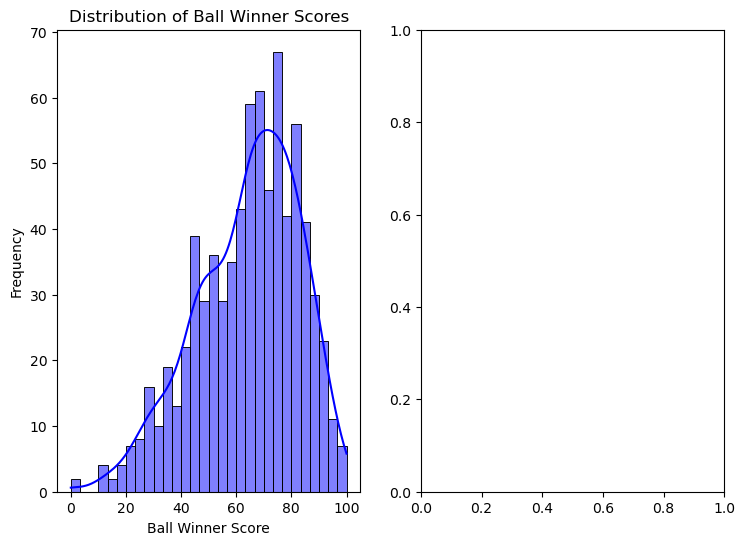

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming RB_scores_df already contains 'progression_score', 'defensive_score', and 'attacking_score'
# Plotting the distribution of scores

plt.figure(figsize=(18, 6))

# Progression Score
plt.subplot(1, 4, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(CM_scores_df['ball_winner_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ball Winner Scores')
plt.xlabel('Ball Winner Score')
plt.ylabel('Frequency')

# Defensive Score
plt.subplot(1, 4, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(CM_scores_df['DLP_score'], bins=30, kde=True, color='green')
plt.title('Distribution of DLP Scores')
plt.xlabel('DLP Score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 4, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(CM_scores_df['dribbler_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Dribbler Scores')
plt.xlabel('Dribbler Score')
plt.ylabel('Frequency')


# Attacking Score
plt.subplot(1, 4, 4)  # 1 row, 3 columns, 3rd subplot
sns.histplot(CM_scores_df['final_third_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Final Third Scores')
plt.xlabel('Final Third Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [105]:
import pandas as pd
import numpy as np
import re

# Create a new column called 'age' in CB_scores
CM_scores_df['age'] = None

# Loop through each row in CB_scores
for index, row in CM_scores_df.iterrows():
    # Get the team and player name from the current row
    team = row['team']
    player = row['player']

    # Find the matching player in the players_df
    matching_player = players_df[(players_df['team'] == team) & (players_df['player'] == player)]

    # If a matching player is found, update the 'age' column in CB_scores
    if not matching_player.empty:
        CM_scores_df.loc[index, 'age'] = matching_player['age'].values[0]

import pandas as pd
import re

# Assuming your DataFrame is named 'df'
CM_scores_df['age'] = CM_scores_df['age'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if pd.notnull(x) else x)

# Print the CB_scores DataFrame to verify
print(CM_scores_df)

                   player             team              league  \
0             Declan Rice          Arsenal  ENG-Premier League   
1                Jorginho          Arsenal  ENG-Premier League   
2             Kai Havertz          Arsenal  ENG-Premier League   
3         Martin Ødegaard          Arsenal  ENG-Premier League   
4         Boubacar Kamara      Aston Villa  ENG-Premier League   
..                    ...              ...                 ...   
758  Bautista Kociubinski          Tucumán          ARG-League   
759   Francisco Di Franco          Tucumán          ARG-League   
760      Guillermo Acosta          Tucumán          ARG-League   
761       Joaquín Pereyra          Tucumán          ARG-League   
762   Juan Ignacio Méndez  Vélez Sarsfield          ARG-League   

     deep_lying_playmaker_score  ball_winner_score  dribbler_score  \
0                     98.295401          97.010689       88.495594   
1                     75.226239          67.029026       47.592171 

In [106]:
CM_scores_df.to_csv('Center Midfielder Role Scores.csv', index=False)

In [16]:
# Columns that contain scores
score_columns = ['progression_score', 'defensive_score', 'attacking_score']

# Round each score column to two decimal places
for column in score_columns:
    if column in RB_scores_df.columns:
        RB_scores_df[column] = RB_scores_df[column].round(2)

# Display the DataFrame to verify the changes
print(RB_scores_df.head())


                player         team              league  progression_score  \
0         Jakub Kiwior      Arsenal  ENG-Premier League              79.15   
1  Oleksandr Zinchenko      Arsenal  ENG-Premier League              78.02   
2    Takehiro Tomiyasu      Arsenal  ENG-Premier League              55.28   
3          Lucas Digne  Aston Villa  ENG-Premier League              59.68   
4          Álex Moreno  Aston Villa  ENG-Premier League              50.48   

   defensive_score  attacking_score  
0            65.10            32.83  
1            83.30            76.90  
2            54.80            27.20  
3            62.30            84.79  
4            62.27            65.80  


In [17]:
RB_scores_df.to_csv('Left Back Role Scores.csv', index=False)

C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


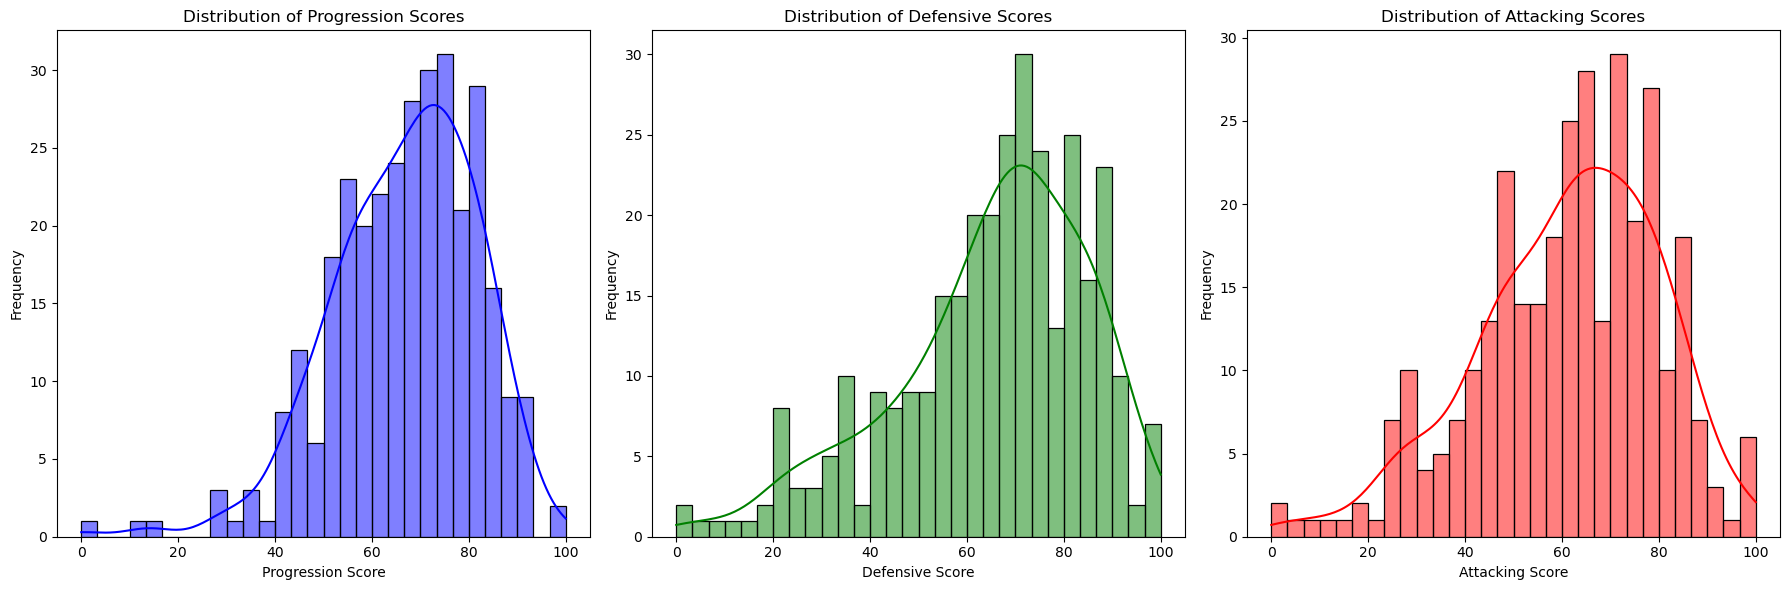

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming RB_scores_df already contains 'progression_score', 'defensive_score', and 'attacking_score'
# Plotting the distribution of scores

plt.figure(figsize=(18, 6))

# Progression Score
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(RB_scores_df['progression_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Progression Scores')
plt.xlabel('Progression Score')
plt.ylabel('Frequency')

# Defensive Score
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(RB_scores_df['defensive_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Defensive Scores')
plt.xlabel('Defensive Score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(RB_scores_df['attacking_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Attacking Scores')
plt.xlabel('Attacking Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [19]:
# Display descriptive statistics for the three score columns
descriptive_statistics = RB_scores_df[['progression_score', 'defensive_score', 'attacking_score']].describe()
print(descriptive_statistics)


       progression_score  defensive_score  attacking_score
count         319.000000       319.000000       319.000000
mean           66.787398        65.163135        61.236458
std            14.908841        20.073909        18.856082
min             0.000000         0.000000         0.000000
25%            56.815000        55.160000        48.970000
50%            68.120000        69.370000        63.410000
75%            78.005000        80.605000        75.435000
max           100.000000       100.000000       100.000000


In [21]:
def custom_scale(score, threshold=0.8, max_scale=100):
    """ Scale scores such that only scores above a certain threshold reach near the maximum of the scale. """
    if score < threshold:
        return (score / threshold) * (max_scale * 0.5)  # Scale to half of the maximum if below threshold
    else:
        return 50 + ((score - threshold) / (1 - threshold)) * 50  # Scale from 50 to 100 if above threshold

# Apply custom scaling to each score
RB_scores_df['progression_score_scaled'] = RB_scores_df['progression_score'].apply(lambda x: custom_scale(x, threshold=0.8))
RB_scores_df['defensive_score_scaled'] = RB_scores_df['defensive_score'].apply(lambda x: custom_scale(x, threshold=0.8))
RB_scores_df['attacking_score_scaled'] = RB_scores_df['attacking_score'].apply(lambda x: custom_scale(x, threshold=0.8))
